In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2018-06-01 17:13:13.267376


#### Current runs for implementation

In [4]:
runs = [
    'run_0100'
]

#### Check that all run files are up-to-date

In [5]:
for r in runs:
    run = RunManager('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0100 - 2018-06-05 00:00:00


#### Import

In [23]:
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('score_var', 'prma_20')]

run1 = RunManager('StatArbStrategy', 'run_0100', drop_params=drop_params, test_periods=0)

## Create combo search
comb = CombinationSearch(write_flag=True)
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

#for r in runs:
comb.add_run(run1)

In [24]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180608133346
Max date: 2018-06-05
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [04:22<00:00, 13.76s/it]


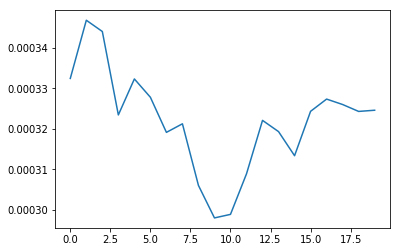

In [25]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

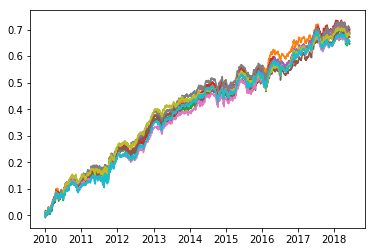

In [26]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()

In [27]:
df = rollup_returns(comb.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.050286,0.015317,0.070160,-0.019603,0.116160
2011,0.020412,0.017498,-0.022073,0.097734,0.113571
2012,0.019383,-0.005568,0.037109,0.073845,0.124769
2013,-0.024763,0.038173,0.034214,0.015032,0.062656
2014,0.040040,0.021480,-0.022805,0.024157,0.062872
2015,-0.010325,0.060533,-0.023645,0.031649,0.058213
2016,0.049041,-0.025569,0.006914,0.039137,0.069523
2017,0.025846,0.061811,-0.021417,0.003842,0.070081


In [28]:
df.year.iloc[:-1].mean()

0.084730683931781361

In [29]:
comb.best_results_returns.iloc[-20:].sum()

0    0.000305
1   -0.006304
2   -0.006648
3   -0.000066
4   -0.008092
5   -0.002516
6   -0.004925
7   -0.003871
8   -0.001425
9   -0.000818
dtype: float64

In [30]:
comb.best_results_returns.index.max()

Timestamp('2018-06-05 00:00:00')